In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))

In [2]:
from typing import Tuple

import numpy as np
import pandas as pd

from statsmodels.graphics import tsaplots
from load_dataset import Dataset
import matplotlib.pyplot as plt
import plotting

from statsmodels.tsa.stattools import adfuller

In [3]:
from statsmodels.stats import diagnostic


In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [6]:
dataset = Dataset('../data/dataset/')

# Задание 1. 
(2 балла) Используя подход box-jenkins постройте модель ARIMA
(statsmodels.tsa.arima_model) для временного ряда dow_jones_0.
Сделайте прогноз на 30 точек вперед. Интерпретируйте
полученный результат. 

In [9]:
dj = dataset['dow_jones_0.csv']

<AxesSubplot:xlabel='2018-11-30'>

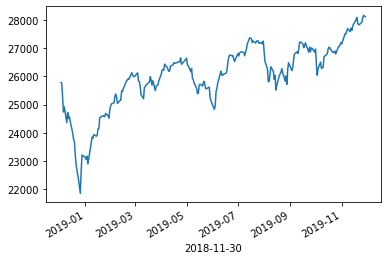

In [12]:
dj.plot()

Видим, что ряд нестацонарен, и что дифференцирование ряда должно, по идее привести его к стационарности. 

In [33]:
dj_diff = dj.diff()

<AxesSubplot:xlabel='2018-11-30'>

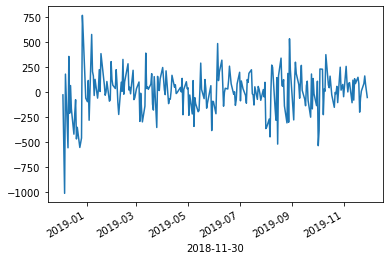

In [34]:
dj_diff.plot()

В целом похоже на стациноарный ряд с некоторыми выборосами в начале датасета

In [82]:
p_value = adfuller(dj_diff.dropna())[1]
p_value

7.270680965724108e-27

Критерий Дики-Фулера позволяет отбросить нулевую гипотезу, что ряд нестационарен.

Сезонности не наблюдается

In [18]:
d = 1
D = 0

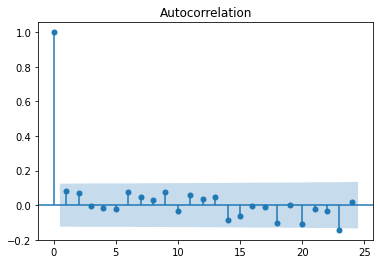

In [78]:
plot_acf(dj_diff.dropna());


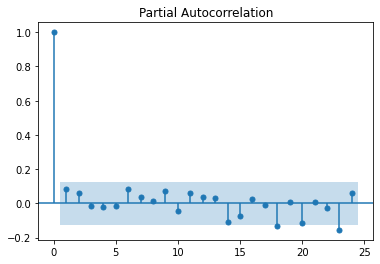

In [79]:
plot_pacf(dj_diff.dropna());

Мы видим, что на обоих графиках резкое падение, значит модели неразделимы и подход Бокса-Дженкинса неприменим